In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from get_aq_data import get_flo_data, ID_to_name

In [4]:
data, hourly_mean, daily_mean = get_flo_data()

### Doing the error bars based on differences between sensors

In [5]:
avg_15min = data['2019-04-15':'2019-05-30'].groupby(data['2019-04-15':'2019-05-30'].index.time).mean()
avg_15min = avg_15min.drop('nesta-8', axis=1)

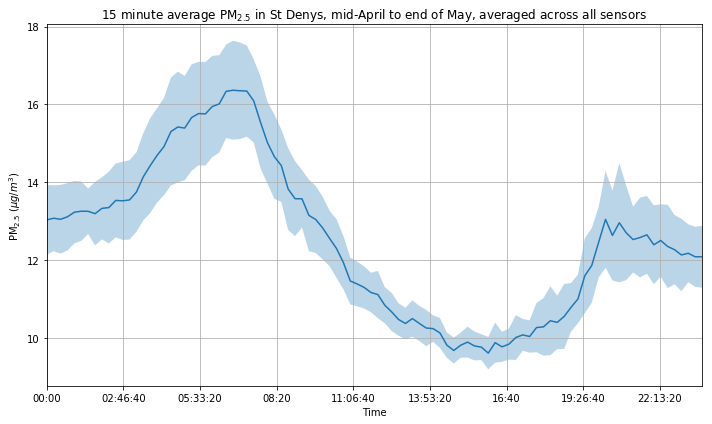

In [6]:
avg_15min_avg = avg_15min.mean(axis=1)
avg_15min_std = avg_15min.std(axis=1)

avg_15min_avg.plot(figsize=(10, 6))
plt.fill_between(avg_15min_avg.index, avg_15min_avg - avg_15min_std, avg_15min_avg + avg_15min_std, alpha=0.3)

plt.grid(axis='both', which='major')
plt.xlabel('Time')
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
#plt.annotate("April", xy=(70, 35), xycoords='figure points')
plt.title('15 minute average $\mathrm{PM}_{2.5}$ in St Denys, mid-April to end of May, averaged across all sensors')
plt.tight_layout()
#plt.savefig('graphs/15min_average_across_all_sensors.png', dpi=300)

### Doing the error bars across time for the 15min averaging

In [7]:
all_sites = data.mean(axis=1)

In [8]:
avg_15min = all_sites['2019-04-15':'2019-05-30'].groupby(all_sites['2019-04-15':'2019-05-30'].index.time).mean()
std_15min = all_sites['2019-04-15':'2019-05-30'].groupby(all_sites['2019-04-15':'2019-05-30'].index.time).std()


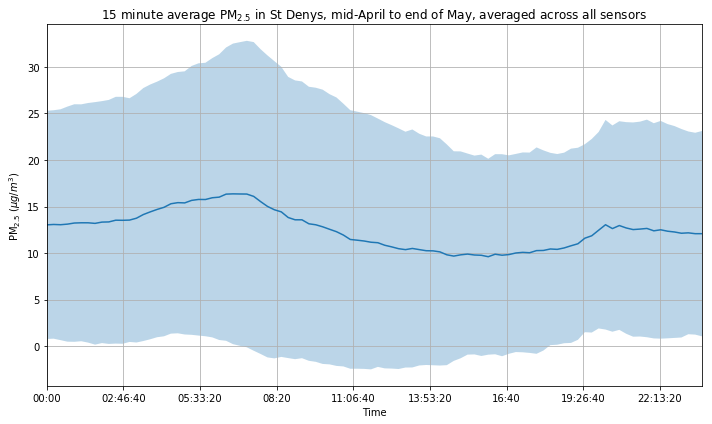

In [9]:
avg_15min.plot(figsize=(10, 6))
plt.fill_between(avg_15min.index, avg_15min - std_15min, avg_15min + std_15min, alpha=0.3)

plt.grid(axis='both', which='major')
plt.xlabel('Time')
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
#plt.annotate("April", xy=(70, 35), xycoords='figure points')
plt.title('15 minute average $\mathrm{PM}_{2.5}$ in St Denys, mid-April to end of May, averaged across all sensors')
plt.tight_layout()
plt.savefig('graphs/15min_average_across_all_sensors.png', dpi=300)

In [12]:
avg_15min = data['2019-04-15':'2019-05-30'].groupby(all_sites['2019-04-15':'2019-05-30'].index.time).mean()

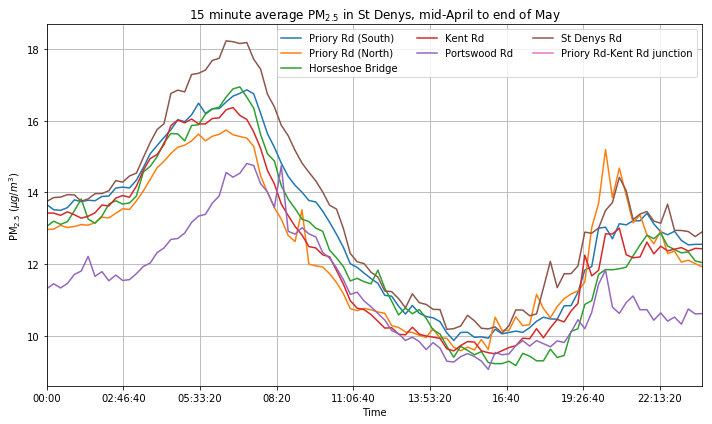

In [13]:
avg_15min.rename(columns=ID_to_name).plot(figsize=(10,6))
#plt.grid(axis='both', which='minor')
plt.grid(axis='both', which='major')
plt.legend(ncol=3)
plt.xlabel('Time')
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
#plt.annotate("April", xy=(70, 35), xycoords='figure points')
plt.title('15 minute average $\mathrm{PM}_{2.5}$ in St Denys, mid-April to end of May')
plt.tight_layout()
plt.savefig('graphs/15min_average.png', dpi=300)